# ASSIGNMENT 2 - FINAL PHASE
# Dental Clinic Queuing System

**Môn học:** System Performance Evaluation (CO3007)  
**Tên nhóm:** Shadow Gambit

**Thành viên nhóm:**
| STT | Họ và tên                  | MSSV    | Nhiệm vụ   |
|-----|----------------------------|---------|------------|
| 1   | Nguyễn Doãn Quang          | 2312794 | Platoon 1  |
| 2   | Phạm Hà Bảo Long           | 2211893 | Platoon 1  |
| 3   | Trịnh Bá Học               | 2311102 | Platoon 1  |
| 4   | Tăng Nguyễn Nhật Quỳnh     | 2212896 | Platoon 2  |
| 5   | Đặng Gia Hưng              | 2311318 | Platoon 2  |
| 6   | Lê Quyết Trung Hiếu        | 2310952 | Platoon 3  |
| 7   | Đỗ Thành Danh              | 2210451 | Platoon 3  |
| 8   | Trần Đức Tiến              | 2014732 | Platoon 3  |
---

**Cập nhật cuối cùng lúc:** **28 tháng 11 năm 2025**

---

## MỤC LỤC

1. [Tổng quan hệ thống](#1-tổng-quan-hệ-thống)
2. [Định nghĩa các hàm chức năng](#2-định-nghĩa-các-hàm-chức-năng)
3. [Giao diện lập trình](#3-giao-diện-lập-trình)
4. [Định nghĩa các lớp](#4-định-nghĩa-các-lớp)
5. [Mô phỏng các kịch bản](#5-kiểm-thử)
6. [Tính toán các thông số](#6-tính-toán-các-thông-số)
7. [Tóm tắt, kết luận và hướng phát triển](#7-tóm-tắt,-kết-luận-và-hướng-phát-triển)
8. [Tài liệu tham khảo](#8-tài-liệu-tham-khảo)
---

## 1. TỔNG QUAN HỆ THỐNG

### 1.1 Giới thiệu
Trong đề tài này, nhóm xây dựng mô hình mô phỏng hệ thống phòng khám nha khoa có nhiều ghế nha sĩ.
Bệnh nhân đến ngẫu nhiên theo thời gian, nếu còn ghế trống thì được phục vụ ngay.
Nếu tất cả các ghế đều đang bận, bệnh nhân sẽ xếp hàng chờ (nếu hàng đợi còn chỗ),
hoặc rời đi nếu hàng đợi đã đầy.

Hệ thống này được mô hình hóa và đánh giá để xem:

* Thời gian chờ trung bình của bệnh nhân
* Mức độ sử dụng ghế nha sĩ

* Tốc độ phục vụ trung bình (throughput)
* Xác suất bệnh nhân bị từ chối khi quá tải

**Sử dụng mô hình M/M/c**

Trong đó:

* M: Quá trình khách đến

* M: thời gian phục vụ

* c: Số lượng ghế nha sĩ (số server)



**Các tham số chính**

* λ: Tốc độ bệnh nhân đến (bệnh nhân/phút)

* μ: Tốc độ phục vụ (bệnh nhân/phút/ghê)

* c: Số lượng ghế nha sĩ


**Các chỉ số hiệu năng cần đánh giá**

* throughput: tốc độ xử lý trung bình.

* L: số bệnh nhân trung bình trong hệ thống.

* Lq: số bệnh nhân trung bình trong hàng đợi.

* W: thời gian trung bình trong hệ thống.

* Wq: thời gian chờ trung bình.

Hệ thống mô phỏng quy trình khám chữa bệnh tại phòng khám nha khoa với 3 giai đoạn chính:

```
Patient Arrivals → [Reception M/M/2] → [Examination M/M/3] → [Treatment M/M/2] → Exit
```

### 1.2 Kiến trúc hệ thống

#### Queue 1: Reception (M/M/2)
- **Servers:** 2 lễ tân
- **Function:** Tiếp nhận và đăng ký bệnh nhân
- **Service Time:** Exponential, mean = 5 phút

#### Queue 2: Examination (M/M/3)
- **Servers:** 3 bác sĩ
- **Function:** Khám và chẩn đoán bệnh
- **Service Time:** Exponential, mean = 15 phút
- **Routing:** 30% cần điều trị, 70% ra về

#### Queue 3: Treatment (M/M/2)
- **Servers:** 2 ghế điều trị
- **Function:** Điều trị cho bệnh nhân cần thiết
- **Service Time:** Exponential, mean = 20 phút

### 1.3 Ánh xạ vào mô hình hàng đợi

| Real-World Component | Queuing Parameter | Value |
|---------------------|-------------------|-------|
| Bệnh nhân đến | λ (arrival rate) | 10 patients/hour |
| Số lễ tân | c₁ | 2 |
| Số bác sĩ | c₂ | 3 |
| Số ghế điều trị | c₃ | 2 |
| Thời gian tiếp nhận | μ₁ | 1/5 min |
| Thời gian khám | μ₂ | 1/15 min |
| Thời gian điều trị | μ₃ | 1/20 min |
| Xác suất cần điều trị | p | 0.3 |

### 1.4 Ánh xạ chi tiết từ bài toán thực tế vào mô hình

| Real-World Component | Mathematical Model | Parameter | Value | Justification |
|---------------------|-------------------|-----------|-------|---------------|
| **Arrival Process** |
| Bệnh nhân đến ngẫu nhiên | Poisson Process | M (Markovian) | λ=10/hr | Independent arrivals, memoryless |
| Thời gian giữa 2 arrivals | Exponential | Mean | 6 minutes | 60/λ = 60/10 = 6 |
| **Reception Queue** |
| Thời gian check-in | Exponential | M (Markovian) | μ=12/hr | Memoryless service |
| Số lễ tân | Server capacity | c | 2 | Physical constraint |
| Waiting area | Queue capacity | K | ∞ (unlimited) | Large waiting room |
| Queueing discipline | Service order | D | FCFS | Fair, first-come basis |
| **Examination Queue** |
| Thời gian khám bệnh | Exponential | M | μ=4/hr | Memoryless diagnosis |
| Số bác sĩ | Server capacity | c | 3 | Clinic has 3 dentists |
| Quyết định điều trị | Bernoulli trial | p | 0.3 | 30% need treatment |
| **Treatment Queue** |
| Thời gian điều trị | Exponential | M | μ=3/hr | Memoryless treatment |
| Số ghế điều trị | Server capacity | c | 2 | 2 treatment chairs |
| **System Type** |
| Full system | Network of queues | Tandem + Split | M/M/2→M/M/3→M/M/2 | Serial with routing |

**Các giả định chính của mô hình:**
1. Quá trình đến tuân theo phân bố Poisson
2. Thời gian phục vụ tuân theo phân bố hàm mũ (không nhớ)
3. Hàng đợi có sức chứa vô hạn
4. Quy tắc phục vụ FCFS (First Come – First Served)
5. Xác suất bệnh nhân cần điều trị chi tiết là 30% (giả định đơn giản hóa)

---

## 2. ĐỊNH NGHĨA CÁC HÀM CHỨC NĂNG

### 2.1 Patient Generator 

**Chức năng:** Sinh ra các bệnh nhân theo phân phối Poisson

**Đầu vào:**
- `env`: SimPy environment
- `arrival_rate`: Tỷ lệ đến (λ) - patients/hour
- `num_patients` hoặc `sim_time`: Số bệnh nhân hoặc thời gian mô phỏng

**Đầu ra:**
- Luồng các đối tượng bệnh nhân

**Luồng xử lý:**
1. Tính inter-arrival time từ Exponential distribution
2. Tạo Patient object với unique ID
3. Ghi nhận arrival time
4. Chuyển patient vào Reception Queue

**Các số liệu được thu thập:**
- Tổng số bệnh nhân được sinh ra
- Thời điểm bệnh nhân đến
- Phân phối thời gian giữa các lần đến liên tiếp

---

### 2.2 Reception Queue 

**Chức năng:** Xử lý check-in và tiếp nhận bệnh nhân

**Đầu vào:**
- `patient`: Patient object
- `num_receptionists`: Số lễ tân (c=2)
- `mean_service_time`: Thời gian phục vụ TB (5 min)

**Đầu ra:**
- Patient object với updated timestamps

**Luồng xử lý:**
1. Bệnh nhân đến hàng đợi tiếp nhận
2. Chờ đợi nếu tất cả lễ tân đều bận
3. Yêu cầu một lễ tân phục vụ
4. Tính toán thời gian chờ
5. Sinh ra thời gian phục vụ (theo phân phối Exponential)
6. Tiến hành thủ tục đăng ký
7. Release receptionist
8. Chuyển bệnh nhân sang giai đoạn khám (Examination)
**Các số liệu được thu thập:**
- Độ dài hàng đợi theo thời gian
- Thời gian chờ
- Thời gian phục vụ
- Mức sử dụng của server (lễ tân)
- Số bệnh nhân đã được phục vụ / bị từ chối

---

### 2.3 Examination Queue

**Chức năng:** Khám bệnh và quyết định điều trị

**Đầu vào:**
- `patient`: Patient object
- `num_doctors`: Số bác sĩ (c=3)
- `mean_examination_time`: Thời gian khám TB (15 min)
- `treatment_probability`: Xác suất cần điều trị (0.3)

**Đầu ra:**
- Patient object với treatment decision

**Luồng xử lý:**
1. Bệnh nhân đến hàng đợi khám (examination queue)
2. Chờ đợi bác sĩ có sẵn
3. Tiến hành khám bệnh
4. Quyết định liệu bệnh nhân có cần điều trị hay không (với xác suất 30%)
5. Đánh dấu patient.needs_treatment là True nếu cần điều trị
6. Chuyển bệnh nhân sang giai đoạn điều trị (Treatment) hoặc ra về

**Các số liệu được thu thập:**
- Độ dài hàng đợi
- Thời gian chờ
- Thời gian khám bệnh
- Mức sử dụng bác sĩ
- Tỷ lệ bệnh nhân cần điều trị và không cần điều trị

---

### 2.4 Treatment Queue 

**Chức năng:** Điều trị cho bệnh nhân cần thiết

**Đầu vào:**
- `patient`: Patient object (needs_treatment=True)
- `num_chairs`: Số ghế điều trị (c=2)
- `mean_treatment_time`: Thời gian điều trị TB (20 min)

**Đầu ra:**
- Completed patient

**Process:**
1. Chỉ tiếp nhận bệnh nhân cần điều trị
2. Chờ đợi ghế điều trị có sẵn
3. Tiến hành điều trị
4. Hoàn tất và rời khỏi hệ thống

**Metrics Collected:**
- Độ dài hàng đợi
- Thời gian chờ
- Thời gian điều trị
- Mức sử dụng ghế điều trị
- Tổng thời gian trong hệ thống

---

### 2.5 Visualization

**Chức năng:** Tạo charts và visualizations

**Các biểu đồ:**
1. Biểu đồ độ dài hàng đợi theo thời gian (biểu đồ đường)
2. Phân phối thời gian chờ (biểu đồ histogram)
3. So sánh mức sử dụng server (biểu đồ cột)
4. So sánh kết quả mô phỏng với lý thuyết (biểu đồ cột nhóm)
5. Luồng bệnh nhân (biểu đồ Sankey - tùy chọn)

---

## 3. GIAO DIỆN LẬP TRÌNH

### 3.1 Các thư viện cần thiết

Các thư viện cần thiết cho project:
- simpy
- matplotlib
- panda 

In [16]:
# Import required libraries
import simpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from typing import List, Dict, Tuple, Optional
import random

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Configure matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mAll libraries imported successfully!\033[0m")
print(f"\033[92m[INFO]\033[0m \033[1m\033[92mSimPy version: {simpy.__version__}\033[0m")
print(f"\033[92m[INFO]\033[0m \033[1m\033[92mNumPy version: {np.__version__}\033[0m")

def title(text):
    print("\n\033[92m" + "═" * 70 + "\033[0m")
    print(f"\033[1m\033[92m         {text}         \033[0m".center(70))
    print("\033[92m" + "═" * 70 + "\033[0m\n")
print(f"\033[92m[INFO]\033[0m \033[1m\033[92mFunction title defined successfully!\033[0m")

[SUCCESS] All libraries imported successfully!
[INFO] SimPy version: 4.1.1
[INFO] NumPy version: 2.3.5
[INFO] Function title defined successfully!


### 3.2 Các thông số hệ thống

Định nghĩa các thông số cho hệ thống:

In [36]:
# System Configuration
class SystemConfig:
    """Configuration parameters for Dental Clinic Queuing System"""

    # Arrival parameters
    ARRIVAL_RATE = 10.0  # patients per hour

    # Reception Queue (M/M/2)
    NUM_RECEPTIONISTS = 2
    MEAN_RECEPTION_TIME = 5.0  # minutes

    # Examination Queue (M/M/3)
    NUM_DOCTORS = 3
    MEAN_EXAMINATION_TIME = 15.0  # minutes
    TREATMENT_PROBABILITY = 0.3  # 30% need treatment

    # Treatment Queue (M/M/2)
    NUM_TREATMENT_CHAIRS = 2
    MEAN_TREATMENT_TIME = 20.0  # minutes

    # Simulation parameters
    SIM_TIME = 480  # minutes (8 hours)

    @classmethod
    def display(cls):
        """Display all configuration parameters"""
        print("\n" + "\033[92m" + "╔" + "═" * 68 + "╗\033[0m")
        print("\033[92m║\033[0m" + "        DENTAL CLINIC SYSTEM CONFIGURATION        ".center(68) + "\033[92m║\033[0m")
        print("\033[92m╚" + "═" * 68 + "╝\033[0m\n")

        print(f"   \033[96mArrival Rate\033[0m                  : \033[93m{cls.ARRIVAL_RATE}\033[0m patients/hour")
        print(f"   \033[96mSimulation Duration\033[0m           : \033[93m{cls.SIM_TIME}\033[0m minutes (\033[93m{cls.SIM_TIME/60:.1f}\033[0m hours)\n")

        print(f"   \033[1m\033[92mReception Queue (M/M/{cls.NUM_RECEPTIONISTS})\033[0m")
        print(f"      • Số lễ tân                : \033[93m{cls.NUM_RECEPTIONISTS}\033[0m người")
        print(f"      • Thời gian phục vụ trung bình : \033[93mExp({cls.MEAN_RECEPTION_TIME} phút)\033[0m → \033[93m{60/cls.MEAN_RECEPTION_TIME:.1f} bệnh nhân/giờ/lễ tân\033[0m\n")

        print(f"   \033[1m\033[92mExamination Queue (M/M/{cls.NUM_DOCTORS})\033[0m")
        print(f"      • Số bác sĩ                : \033[93m{cls.NUM_DOCTORS}\033[0m người")
        print(f"      • Thời gian khám trung bình : \033[93mExp({cls.MEAN_EXAMINATION_TIME} phút)\033[0m")
        print(f"      • Tỷ lệ cần điều trị       : \033[93m{cls.TREATMENT_PROBABILITY:.1%}\033[0m\n")

        print(f"   \033[1m\033[92mTreatment Queue (M/M/{cls.NUM_TREATMENT_CHAIRS})\033[0m")
        print(f"      • Số ghế điều trị          : \033[93m{cls.NUM_TREATMENT_CHAIRS}\033[0m ghế")
        print(f"      • Thời gian điều trị trung bình : \033[93mExp({cls.MEAN_TREATMENT_TIME} phút)\033[0m → \033[93m{60/cls.MEAN_TREATMENT_TIME:.1f} bệnh nhân/giờ/ghế\033[0m")

        print("\n" + "\033[92m" + "╚" + "═" * 68 + "╝\033[0m")
        print("\033[92m" + "═" * 70 + "\033[0m\n")

# Display configuration
SystemConfig.display()


╔════════════════════════════════════════════════════════════════════╗
║                 DENTAL CLINIC SYSTEM CONFIGURATION                 ║
╚════════════════════════════════════════════════════════════════════╝

   Arrival Rate                  : 10.0 patients/hour
   Simulation Duration           : 480 minutes (8.0 hours)

   Reception Queue (M/M/2)
      • Số lễ tân                : 2 người
      • Thời gian phục vụ trung bình : Exp(5.0 phút) → 12.0 bệnh nhân/giờ/lễ tân

   Examination Queue (M/M/3)
      • Số bác sĩ                : 3 người
      • Thời gian khám trung bình : Exp(15.0 phút)
      • Tỷ lệ cần điều trị       : 30.0%

   Treatment Queue (M/M/2)
      • Số ghế điều trị          : 2 ghế
      • Thời gian điều trị trung bình : Exp(20.0 phút) → 3.0 bệnh nhân/giờ/ghế

╚════════════════════════════════════════════════════════════════════╝
══════════════════════════════════════════════════════════════════════



---

## 4. ĐỊNH NGHĨA CÁC LỚP

### 4.1 Patient Class

Đại diện cho một bệnh nhân trong hệ thống:

In [18]:
class Patient:
    """
    Represents a patient in the dental clinic system

    Attributes:
        patient_id (int): Unique identifier
        arrival_time (float): Time when patient arrived at clinic
        reception_start_time (float): Time when reception service started
        reception_end_time (float): Time when reception service ended
        examination_start_time (float): Time when examination started
        examination_end_time (float): Time when examination ended
        treatment_start_time (float): Time when treatment started
        treatment_end_time (float): Time when treatment ended
        needs_treatment (bool): Whether patient needs treatment
    """

    def __init__(self, patient_id: int, arrival_time: float):
        self.patient_id = patient_id
        self.arrival_time = arrival_time

        # Timestamps for each stage
        self.reception_start_time = None
        self.reception_end_time = None
        self.examination_start_time = None
        self.examination_end_time = None
        self.treatment_start_time = None
        self.treatment_end_time = None

        # Treatment flag
        self.needs_treatment = False

    def get_total_time_in_system(self) -> float:
        """
        Calculate total time spent in the system

        Returns:
            float: Total time from arrival to exit (minutes)
        """
        if self.needs_treatment and self.treatment_end_time:
            return self.treatment_end_time - self.arrival_time
        elif self.examination_end_time:
            return self.examination_end_time - self.arrival_time
        return 0.0

    def get_waiting_time(self, queue_name: str) -> float:
        """
        Calculate waiting time at a specific queue

        Args:
            queue_name (str): 'reception', 'examination', or 'treatment'

        Returns:
            float: Waiting time in minutes
        """
        if queue_name == 'reception':
            if self.reception_start_time and self.reception_end_time:
                return self.reception_start_time - self.arrival_time
        elif queue_name == 'examination':
            if self.examination_start_time and self.reception_end_time:
                return self.examination_start_time - self.reception_end_time
        elif queue_name == 'treatment':
            if self.treatment_start_time and self.examination_end_time:
                return self.treatment_start_time - self.examination_end_time
        return 0.0

    def __repr__(self):
        return f"Patient({self.patient_id})"

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mPatient class defined\033[0m")

[SUCCESS] Patient class defined


### 4.2 Lớp QueueSystem

Base class cho tất cả các queue systems:

In [19]:
class QueueSystem:
    """
    Base class for M/M/c queue systems

    Attributes:
        env (simpy.Environment): Simulation environment
        num_servers (int): Number of servers (c)
        mean_service_time (float): Mean service time (1/μ)
        queue_name (str): Name of the queue
        servers (simpy.Resource): SimPy resource for servers
        waiting_times (list): List of waiting times
        service_times (list): List of service times
        queue_lengths (list): List of queue lengths
        queue_length_over_time (list): Time series of queue length
        patients_served (int): Count of patients served
        patients_rejected (int): Count of patients rejected
    """

    def __init__(self,
                 env: simpy.Environment,
                 num_servers: int,
                 mean_service_time: float,
                 queue_name: str,
                 max_queue_capacity: Optional[int] = None):

        self.env = env
        self.num_servers = num_servers
        self.mean_service_time = mean_service_time
        self.queue_name = queue_name
        self.max_queue_capacity = max_queue_capacity

        # SimPy Resource
        self.servers = simpy.Resource(env, capacity=num_servers)

        # Metrics collection
        self.waiting_times = []
        self.service_times = []
        self.queue_lengths = []
        self.queue_length_over_time = []  # [(time, length), ...]
        self.patients_served = 0
        self.patients_rejected = 0

    def record_queue_length(self):
        """Record current queue length"""
        current_length = len(self.servers.queue)
        self.queue_lengths.append(current_length)
        self.queue_length_over_time.append((self.env.now, current_length))

    def get_utilization(self, arrival_rate: float) -> float:
        """
        Calculate server utilization

        Args:
            arrival_rate (float): Arrival rate λ (customers/hour)

        Returns:
            float: Utilization ρ = λ/(c×μ)
        """
        service_rate = 1.0 / self.mean_service_time  # μ per minute
        arrival_rate_per_min = arrival_rate / 60.0  # Convert to per minute
        return arrival_rate_per_min / (self.num_servers * service_rate)

    def get_average_waiting_time(self) -> float:
        """Calculate average waiting time"""
        return np.mean(self.waiting_times) if self.waiting_times else 0.0

    def get_average_queue_length(self) -> float:
        """Calculate average queue length"""
        return np.mean(self.queue_lengths) if self.queue_lengths else 0.0

    def get_max_queue_length(self) -> int:
        """Get maximum queue length observed"""
        return max(self.queue_lengths) if self.queue_lengths else 0

    def process_patient(self, patient: Patient):
        """
        Process a patient through the queue (to be implemented by subclasses)

        Args:
            patient (Patient): Patient to process
        """
        raise NotImplementedError("Subclasses must implement process_patient()")

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mQueueSystem base class defined\033[0m")

[SUCCESS] QueueSystem base class defined


### 4.3 Lớp ReceptionQueue

M/M/2 Queue cho Reception:

In [20]:
class ReceptionQueue(QueueSystem):
    """
    M/M/2 Queue for Reception

    Handles patient check-in and registration
    """

    def __init__(self, env: simpy.Environment,
                 num_receptionists: int = 2,
                 mean_service_time: float = 5.0,
                 max_capacity: Optional[int] = None):
        super().__init__(env, num_receptionists, mean_service_time,
                        'Reception', max_capacity)

    def process_patient(self, patient: Patient):
        """
        Process patient check-in

        Process:
        1. Record arrival at queue
        2. Check capacity
        3. Request receptionist
        4. Calculate waiting time
        5. Perform service (exponential time)
        6. Record completion
        7. Release receptionist

        Args:
            patient (Patient): Patient to process

        Yields:
            simpy.events.Process
        """

        arrive_time = self.env.now
        self.record_queue_length()

        # Check capacity if limited
        if (self.max_queue_capacity is not None and
            len(self.servers.queue) >= self.max_queue_capacity):
            self.patients_rejected += 1
            print(f"\033[93m[WARN]\033[0m \033[1m\033[93mPatient {patient.patient_id} rejected at Reception (queue full)\033[0m")
            return

        # Request server
        with self.servers.request() as request:
            yield request

            # Start service
            wait_time = self.env.now - arrive_time
            self.waiting_times.append(wait_time)
            patient.reception_start_time = self.env.now

            # Service time (Exponential distribution)
            service_time = np.random.exponential(self.mean_service_time)
            self.service_times.append(service_time)

            yield self.env.timeout(service_time)

            # End service
            patient.reception_end_time = self.env.now
            self.patients_served += 1
            self.record_queue_length()

            # Debug output
            # print(f"Patient {patient.patient_id} completed reception at {self.env.now:.2f}")

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mReceptionQueue class defined\033[0m")

[SUCCESS] ReceptionQueue class defined


### 4.4 Lớp ExaminationQueue

M/M/3 Queue cho Examination:

In [21]:
class ExaminationQueue(QueueSystem):
    """
    M/M/3 Queue for Examination

    Handles patient examination and treatment decision
    """

    def __init__(self, env: simpy.Environment,
                 num_doctors: int = 3,
                 mean_examination_time: float = 15.0,
                 treatment_probability: float = 0.3,
                 max_capacity: Optional[int] = None):
        super().__init__(env, num_doctors, mean_examination_time,
                        'Examination', max_capacity)
        self.treatment_probability = treatment_probability
        self.patients_needing_treatment = 0

    def process_patient(self, patient: Patient):
        """
        Process patient examination

        Process:
        1. Record arrival
        2. Wait for doctor
        3. Perform examination
        4. Decide if treatment needed (30% probability)
        5. Set patient.needs_treatment flag
        6. Complete

        Args:
            patient (Patient): Patient to examine

        Yields:
            simpy.events.Process
        """
        arrive_time = self.env.now
        self.record_queue_length()

        # Check capacity
        if (self.max_queue_capacity is not None and
            len(self.servers.queue) >= self.max_queue_capacity):
            self.patients_rejected += 1
            print(f"\033[93m[WARN]\033[0m \033[1m\033[93mPatient {patient.patient_id} rejected at Examination (queue full)\033[0m")
            return

        with self.servers.request() as request:
            yield request

            wait_time = self.env.now - arrive_time
            self.waiting_times.append(wait_time)
            patient.examination_start_time = self.env.now

            # Examination
            exam_time = np.random.exponential(self.mean_service_time)
            self.service_times.append(exam_time)
            yield self.env.timeout(exam_time)

            # Decide if treatment needed
            if np.random.random() < self.treatment_probability:
                patient.needs_treatment = True
                self.patients_needing_treatment += 1

            patient.examination_end_time = self.env.now
            self.patients_served += 1
            self.record_queue_length()
            
print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mExaminationQueue class defined\033[0m")

[SUCCESS] ExaminationQueue class defined


### 4.5 Lớp TreatmentQueue

M/M/2 Queue cho Treatment:

In [22]:
class TreatmentQueue(QueueSystem):
    """
    M/M/2 Queue for Treatment

    Handles patient treatment (only those needing it)
    """

    def __init__(self, env: simpy.Environment,
                 num_chairs: int = 2,
                 mean_treatment_time: float = 20.0,
                 max_capacity: Optional[int] = None):
        super().__init__(env, num_chairs, mean_treatment_time,
                        'Treatment', max_capacity)

    def process_patient(self, patient: Patient):
        """
        Process patient treatment

        Process:
        1. Check if patient needs treatment
        2. Wait for treatment chair
        3. Perform treatment
        4. Complete and exit system

        Args:
            patient (Patient): Patient to treat

        Yields:
            simpy.events.Process
        """
        if not patient.needs_treatment:
            return

        arrive_time = self.env.now
        self.record_queue_length()

        if (self.max_queue_capacity is not None and
            len(self.servers.queue) >= self.max_queue_capacity):
            self.patients_rejected += 1
            print(f"⚠️  Patient {patient.patient_id} rejected at Treatment (queue full)")
            print(f"\033[93m[WARN]\033[0m \033[1m\033[93mPatient {patient.patient_id} rejected at Treatment (queue full)\033[0m")
            return

        with self.servers.request() as request:
            yield request

            wait_time = self.env.now - arrive_time
            self.waiting_times.append(wait_time)
            patient.treatment_start_time = self.env.now

            # Treatment
            treatment_time = np.random.exponential(self.mean_service_time)
            self.service_times.append(treatment_time)
            yield self.env.timeout(treatment_time)

            patient.treatment_end_time = self.env.now
            self.patients_served += 1
            self.record_queue_length()

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTreatmentQueue class defined\033[0m")

[SUCCESS] TreatmentQueue class defined


### 4.6 Lớp DentalClinicSystem

Hệ thống chính bao gồm các queue:

In [37]:
class DentalClinicSystem:
    """
    Main Dental Clinic Queuing System

    Integrates Reception → Examination → Treatment queues
    """

    def __init__(self, config: SystemConfig = None):
        """
        Initialize the clinic system

        Args:
            config (SystemConfig): Configuration object (uses default if None)
        """
        if config is None:
            config = SystemConfig

        self.env = simpy.Environment()
        self.arrival_rate = config.ARRIVAL_RATE
        self.mean_interarrival_time = 60.0 / config.ARRIVAL_RATE  # Convert to minutes

        # Initialize queues
        self.reception = ReceptionQueue(
            self.env,
            config.NUM_RECEPTIONISTS,
            config.MEAN_RECEPTION_TIME
        )

        self.examination = ExaminationQueue(
            self.env,
            config.NUM_DOCTORS,
            config.MEAN_EXAMINATION_TIME,
            config.TREATMENT_PROBABILITY
        )

        self.treatment = TreatmentQueue(
            self.env,
            config.NUM_TREATMENT_CHAIRS,
            config.MEAN_TREATMENT_TIME
        )

        # Patient tracking
        self.all_patients = []
        self.patient_counter = 0

    def patient_generator(self, num_patients: Optional[int] = None,
                         sim_time: Optional[float] = None):
        """
        Generate patients according to Poisson process

        Args:
            num_patients (int, optional): Fixed number of patients
            sim_time (float, optional): Simulation time (minutes)

        Note: Provide either num_patients OR sim_time

        Yields:
            simpy.events.Process
        """
        if num_patients:
            # Generate fixed number
            for i in range(num_patients):
                patient = Patient(self.patient_counter, self.env.now)
                self.patient_counter += 1
                self.all_patients.append(patient)

                # Start patient flow
                self.env.process(self.patient_flow(patient))

                # Wait for next arrival
                interarrival = np.random.exponential(self.mean_interarrival_time)
                yield self.env.timeout(interarrival)
        else:
            # Generate until sim time ends
            while True:
                patient = Patient(self.patient_counter, self.env.now)
                self.patient_counter += 1
                self.all_patients.append(patient)

                self.env.process(self.patient_flow(patient))

                interarrival = np.random.exponential(self.mean_interarrival_time)
                yield self.env.timeout(interarrival)

                if num_patients is not None and self.patient_counter >= num_patients:
                    break

                if sim_time and self.env.now >= sim_time:
                    break

    def patient_flow(self, patient: Patient):
        """
        Define patient flow through the system

        Flow: Reception → Examination → Treatment (if needed) → Exit

        Args:
            patient (Patient): Patient object

        Yields:
            simpy.events.Process
        """

        # Step 1: Reception
        yield self.env.process(self.reception.process_patient(patient))
        # If reception was not completed, exit flow
        if patient.reception_end_time is None:
            return

        # Step 2: Examination
        yield self.env.process(self.examination.process_patient(patient))
        # If examination was not completed, exit flow
        if patient.examination_end_time is None:
            return

        # Step 3: Treatment (conditional)
        if patient.needs_treatment:
            yield self.env.process(self.treatment.process_patient(patient))

    def monitor_queue(self, queue_system: QueueSystem, interval: float = 1.0):
        """
        Monitor queue length and plot
        """
        while True:
            queue_system.record_queue_length()
            yield queue_system.env.timeout(interval)

    def run(self, num_patients: Optional[int] = None,
            sim_time: float = 480):
        """
        Run the simulation

        Args:
            num_patients (int, optional): Number of patients to simulate
            sim_time (float): Simulation time in minutes (default: 480 = 8 hours)
        """
        print("\n\033[92m" + "═" * 60 + "\033[0m")
        print("\033[92m          STARTING SIMULATION        \033[0m".format(SystemConfig.ARRIVAL_RATE))
        print("\033[92m" + "═" * 60 + "\033[0m\n")

        # Monitor queues every 1 mins
        self.env.process(self.monitor_queue(self.reception, interval=1.0))
        self.env.process(self.monitor_queue(self.examination, interval=1.0))
        self.env.process(self.monitor_queue(self.treatment, interval=1.0))

        # Start patient generator
        self.env.process(self.patient_generator(num_patients, sim_time))

        # Run simulation
        if num_patients:
            self.env.run()
        else:
            self.env.run(until=sim_time)

        print("\033[92m" + "═" * 60 + "\033[0m")
        print("\033[92m[INFO]\033[0m \033[1m\033[92mSimulation completed at time\033[0m \033[1m\033[96m{:.2f}\033[0m \033[1m\033[92mminutes\033[0m".format(self.env.now))
        print("\033[92m[INFO]\033[0m \033[1m\033[92mTotal patients generated:\033[0m         \033[1m\033[93m{:>4}\033[0m".format(len(self.all_patients)))
        print("\033[92m[INFO]\033[0m \033[1m\033[92mReception served:\033[0m              \033[1m\033[93m{:>4}\033[0m".format(self.reception.patients_served))
        print("\033[92m[INFO]\033[0m \033[1m\033[92mExamination served:\033[0m            \033[1m\033[93m{:>4}\033[0m".format(self.examination.patients_served))
        print("\033[92m[INFO]\033[0m \033[1m\033[92mTreatment served:\033[0m              \033[1m\033[93m{:>4}\033[0m".format(self.treatment.patients_served))
        
        treated = self.examination.patients_needing_treatment
        total = len(self.all_patients)
        percentage = (treated / total * 100) if total > 0 else 0
        print("\033[92m[INFO]\033[0m \033[1m\033[92mPatients needed treatment:\033[0m "
            f"\033[1m\033[93m{treated:>4}  ({percentage:5.1f}%)\033[0m")
        print("\033[92m" + "═" * 60 + "\033[0m")

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mDentalClinicSystem class defined\033[0m")

[SUCCESS] DentalClinicSystem class defined


---

## 5. MÔ PHỎNG CÁC KỊCH BẢN

### 5.1 Kịch bản 1: Low Load

**Input setup:**
- Arrival rate: λ = 5 patients/hour
- Simulation time: 8 hours (480 minutes)

**Expected Output**
- Hệ thống gần như nhàn rỗi.
- Thời gian chờ trung bình thấp, hầu như khách được phục vụ ngay.
- Tài nguyên phục vụ phải chưa được sử dụng tối đa.

**Test Execution:**

In [38]:
title("TEST SCENARIO 1: LOW LOAD (λ = 5 patients/hour)")

# --- Scenario 1: Low Load ---
class LowLoadConfig(SystemConfig):
    ARRIVAL_RATE = 5.0  # half normal
    SIM_TIME = 480      # 8 hours

clinic_low = DentalClinicSystem(LowLoadConfig)
clinic_low.run(sim_time=LowLoadConfig.SIM_TIME)

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTest Scenario 1 completed successfully!\033[0m")



══════════════════════════════════════════════════════════════════════
         TEST SCENARIO 1: LOW LOAD (λ = 5 patients/hour)         
══════════════════════════════════════════════════════════════════════


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simulation completed at time 480.00 minutes
[INFO] Total patients generated:           43
[INFO] Reception served:                42
[INFO] Examination served:              40
[INFO] Treatment served:                15
[INFO] Patients needed treatment:   15  ( 34.9%)
════════════════════════════════════════════════════════════
[SUCCESS] Test Scenario 1 completed successfully!


### 5.2 Kịch bản 2: Normal Load

**Parameters:**
- Arrival rate: λ = 10 patients/hour
- Simulation time: 8 hours (480 minutes)

**Expected Output**
- Tất cả các hàng đợi phải ổn định (ρ < 1)
- Thời gian chờ đợi nằm trong ngưỡng chấp nhận của dịch vụ thực tế.
- Hệ thống xử lý tải thoải mái

**Test Execution:**


In [39]:
# Test Scenario 2: Normal Load
title("TEST SCENARIO 2: NORMAL LOAD (λ = 10 patients/hour)")

# Create system with default configuration
clinic_normal = DentalClinicSystem()

# Run simulation
clinic_normal.run(sim_time=480)  # 8 hours

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTest Scenario 2 completed successfully!\033[0m")


══════════════════════════════════════════════════════════════════════
         TEST SCENARIO 2: NORMAL LOAD (λ = 10 patients/hour)         
══════════════════════════════════════════════════════════════════════


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simulation completed at time 480.00 minutes
[INFO] Total patients generated:           80
[INFO] Reception served:                80
[INFO] Examination served:              79
[INFO] Treatment served:                19
[INFO] Patients needed treatment:   24  ( 30.0%)
════════════════════════════════════════════════════════════
[SUCCESS] Test Scenario 2 completed successfully!


### 5.2 Kịch bản 3: Peak Load

**Parameters:**
- Arrival rate: λ = 20 patients/hour (2x normal)
- Simulation time: 4 hours (240 minutes)

**Expected Output**
- Thời gian chờ đợi lâu hơn
- Hệ thống bắt đầu có dấu hiệu quá tải

**Test Execution:**

In [40]:
# Test Scenario 3: Peak Load
title("TEST SCENARIO 3: PEAK LOAD (λ = 20 patients/hour)")

# Create custom configuration for peak load
class PeakConfig(SystemConfig):
    ARRIVAL_RATE = 20.0  # Double the normal rate
    SIM_TIME = 240  # 4 hours

# Create system with peak configuration
clinic_peak = DentalClinicSystem(PeakConfig)

# Run simulation
clinic_peak.run(sim_time=240)  # 4 hours

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTest Scenario 3 completed successfully!\033[0m")


══════════════════════════════════════════════════════════════════════
         TEST SCENARIO 3: PEAK LOAD (λ = 20 patients/hour)         
══════════════════════════════════════════════════════════════════════


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simulation completed at time 240.00 minutes
[INFO] Total patients generated:           72
[INFO] Reception served:                71
[INFO] Examination served:              51
[INFO] Treatment served:                17
[INFO] Patients needed treatment:   17  ( 23.6%)
════════════════════════════════════════════════════════════
[SUCCESS] Test Scenario 3 completed successfully!


### 5.4. Kịch bản 4: Capacity limited.

**Input setup:**
- Arrival rate: λ = 30 patients/hour
- Simulation time: 4 hours (240 minutes)

**Expected Output**
- Kiểm tra giới hạn hàng đợi, đảm bảo hệ thống từ chối đúng khi quá tải, giúp xác định điểm giới hạn và khả năng phục vụ tối đa.

**Test Execution:**


In [41]:
# Test Scenario 4: Capacity-Limited Queue
title("TEST SCENARIO 4: CAPACITY-LIMITED QUEUE (λ = 30 patients/hour)")

class CapacityLimitedConfig(SystemConfig):
    ARRIVAL_RATE = 30.0      # 30 patients/hour
    SIM_TIME = 240           # 4 hours
    MAX_QUEUE_RECEPTION = 6
    MAX_QUEUE_EXAM = 8
    MAX_QUEUE_TREATMENT = 5

clinic_capacity = DentalClinicSystem(CapacityLimitedConfig)
clinic_capacity.run(sim_time=CapacityLimitedConfig.SIM_TIME)

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTest Scenario 4 completed successfully!\033[0m")


══════════════════════════════════════════════════════════════════════
         TEST SCENARIO 4: CAPACITY-LIMITED QUEUE (λ = 30 patients/hour)         
══════════════════════════════════════════════════════════════════════


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simulation completed at time 240.00 minutes
[INFO] Total patients generated:          122
[INFO] Reception served:                96
[INFO] Examination served:              44
[INFO] Treatment served:                10
[INFO] Patients needed treatment:   15  ( 12.3%)
════════════════════════════════════════════════════════════
[SUCCESS] Test Scenario 4 completed successfully!


### 5.5 Kịch bản 5: Peak + Extra Server (Scaling)

**Input setup**
- Arrival rate: λ = 20 patients/hour
- Simulation time: 4 hours

**Expected Output**
- Tăng số bác sĩ giúp giảm thời gian chờ, cải thiện throughput và giảm bottleneck.

In [42]:
# --- Scenario 5.1: Peak Load (2 dentists) ---
class PeakConfig(SystemConfig):
    ARRIVAL_RATE = 20.0       # 20 patients/hour
    SIM_TIME = 240            # 4 hours
    NUM_DENTISTS = 2          # peak, base

clinic_peak = DentalClinicSystem(PeakConfig)
clinic_peak.run(sim_time=PeakConfig.SIM_TIME)
# --- Scenario 5.2: Peak Load + Add Server (3 dentists) ---
class PeakAddServerConfig(SystemConfig):
    ARRIVAL_RATE = 20.0       # same peak
    SIM_TIME = 240
    NUM_DENTISTS = 3          # one extra dentist

title("TEST SCENARIO 5: SCALING WITH EXTRA DOCTORS")
clinic_peak_add = DentalClinicSystem(PeakAddServerConfig)
clinic_peak_add.run(sim_time=PeakAddServerConfig.SIM_TIME)

print("\033[92m[SUCCESS]\033[0m \033[1m\033[92mTest Scenario 5 completed successfully!\033[0m")


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simulation completed at time 240.00 minutes
[INFO] Total patients generated:           90
[INFO] Reception served:                85
[INFO] Examination served:              38
[INFO] Treatment served:                12
[INFO] Patients needed treatment:   13  ( 14.4%)
════════════════════════════════════════════════════════════

══════════════════════════════════════════════════════════════════════
         TEST SCENARIO 5: SCALING WITH EXTRA DOCTORS         
══════════════════════════════════════════════════════════════════════


════════════════════════════════════════════════════════════
          STARTING SIMULATION        
════════════════════════════════════════════════════════════

════════════════════════════════════════════════════════════
[INFO] Simul

---

## 6. TÍNH TOÁN CÁC THÔNG SỐ

### 6.1 Các công thức cho M/M/c Queue 

#### Basic Parameters:
- $\lambda$ = arrival rate (customers/time unit)
- $\mu$ = tỷ lệ phục vụ (customers/time unit per server)
- $c$ = số server
- $\rho = \frac{\lambda}{c \mu}$ = mức sử dụng của mỗi server

#### Stability Condition:
- Hệ thống ổn định nếu: $\rho < 1$.
- Nếu $\rho ≥ 1$ hệ thống không ổn định, backlog tăng vô hạn theo thời gian.
- Hệ thống có hiệu suất tốt khi $ 0.3 < \rho < 0.7$.
- Hệ thống bắt dầu nhạy với những biến dộng và thời gian chờ tăng lên đáng kể khi $ 0.7 < \rho < 0.85$.
- Nếu $\rho > 0.85$ thì hệ thống có khả năng cao bị tắt nghẽn.

#### Erlang C Formula:
Xác suất chờ đợi:

$$C(c, \rho) = P(\text{wait} > 0) = \frac{\frac{(c\rho)^c}{c!(1-\rho)}}{\sum_{k=0}^{c-1} \frac{(c\rho)^k}{k!} + \frac{(c\rho)^c}{c!(1-\rho)}}$$

#### Performance Metrics:

**Độ dài hàng đợi trung bình:**
$$L_q = C(c,\rho) \cdot \frac{\rho}{1-\rho}$$

**Thời gian chờ trung bình trong hàng đợi:**
$$W_q = \frac{L_q}{\lambda}$$

**Số bệnh nhân trung bình trong hệ thống:**
$$L = L_q + \frac{\lambda}{\mu}$$

**Thời gian trung bình trong hệ thống:**
$$W = W_q + \frac{1}{\mu}$$

#### Little's Law:
$$L = \lambda W$$
$$L_q = \lambda W_q$$

### 6.2 Hiện thực cho các công thức

Chương trình hiện thực:

In [43]:
import math

def calculate_theoretical_metrics(arrival_rate_per_hour: float, 
                                     mean_service_time_minutes: float,
                                     num_servers: int) -> dict:
    """
    Calculate theoretical performance metrics for M/M/c queue
    
    Args:
        arrival_rate_per_hour (float): λ in patients/hour
        mean_service_time_minutes (float): 1/μ in minutes (NOT the rate!)
        num_servers (int): c (number of servers)
        
    Returns:
        dict: Dictionary with theoretical metrics
        
    Example:
        >>> metrics = calculate_theoretical_metrics_v2(
        ...     arrival_rate_per_hour=10.0,      # 10 patients/hour
        ...     mean_service_time_minutes=5.0,   # 5 minutes average
        ...     num_servers=2                     # 2 servers
        ... )
    """
    # Convert to per-minute rates
    lam = arrival_rate_per_hour / 60.0  # arrivals per minute
    mu = 1.0 / mean_service_time_minutes  # service rate per minute
    c = num_servers
    
    # Utilization per server
    rho = lam / (c * mu)
    
    # Check stability
    if rho >= 1:
        return {
            'utilization': rho,
            'stable': False,
            'warning': f'System is unstable (ρ = {rho:.3f} ≥ 1)',
            'message': 'Arrivals exceed service capacity!'
        }
    
    # Calculate P0 (probability of 0 customers in system)
    sum_term = sum([(c * rho)**k / math.factorial(k) for k in range(c)])
    last_term = (c * rho)**c / (math.factorial(c) * (1 - rho))
    P0 = 1 / (sum_term + last_term)
    
    # Erlang C formula (probability of waiting)
    C = ((c * rho)**c / math.factorial(c)) * P0 / (1 - rho)
    
    # Performance metrics
    Lq = C * rho / (1 - rho)  # Average queue length
    Wq = Lq / lam if lam > 0 else 0  # Average waiting time
    L = Lq + lam / mu  # Average number in system
    W = Wq + 1 / mu  # Average time in system
    
    return {
        'utilization': rho,
        'utilization_percent': rho * 100,
        'P0': P0,
        'erlang_C': C,
        'probability_wait_percent': C * 100,
        'avg_queue_length': Lq,
        'avg_system_length': L,
        'avg_waiting_time_minutes': Wq,
        'avg_time_in_system_minutes': W,
        'throughput_per_hour': (lam * 60) if rho < 1 else 0,
        'stable': True,
        'interpretation': f"System is {'STABLE' if rho < 0.8 else 'BUSY but stable'}"
    }

In [44]:
# ---------------------------
# PRINT PRETTIER
# ---------------------------

def print_header(text):
    print("\n\033[92m" + "═" * 70 + "\033[0m")
    print(f"\033[1m\033[92m{text.center(70)}\033[0m")
    print("\033[92m" + "═" * 70 + "\033[0m\n")

def print_metric(key, value):
    if isinstance(value, float):
        print(f"   \033[96m{key:<22}\033[0m: \033[93m{value:8.4f}\033[0m")
    else:
        print(f"   \033[96m{key:<22}\033[0m: \033[93m{value}\033[0m")
        
# ---------------------------
# SCENARIOS
# ---------------------------

service_rate = 1/5.0  # 12 bệnh nhân/giờ mỗi lễ tân

scenarios = {
    "Low Load":         (5,  service_rate, 2),
    "Normal Load":      (10, service_rate, 2),
    "High Load":        (20, service_rate, 2),
    "Very High Load":   (30, service_rate, 2),
    "Capacity Limited": (15, service_rate, 2)
}

print_header("THEORETICAL M/M/c METRICS FOR RECEPTION QUEUE")

for name, (arrival_rate, sr, servers) in scenarios.items():
    print(f"\033[1m\033[92m>>> {name.upper()} (λ = {arrival_rate} patients/hour, c = {servers})\033[0m")
    metrics = calculate_theoretical_metrics(arrival_rate, sr, servers)
    
    for key, value in metrics.items():
        print_metric(key, value)
    print()  # dòng trống giữa các kịch bản

# ================================
# SCENARIO 5: SCALING (TREATMENT QUEUE)
# ================================

print_header("SCENARIO 5: PEAK LOAD + SCALING (TREATMENT QUEUE)")

arrival_rate = 20
sr_treatment = 1/20.0  # 3 bệnh nhân/giờ mỗi ghế

print("\033[1m\033[92m>>> BEFORE SCALING: 2 treatment chairs (M/M/2)\033[0m")
metrics_before = calculate_theoretical_metrics(arrival_rate * 0.3, sr_treatment, 2)  # 30% cần điều trị
for k, v in metrics_before.items():
    print_metric(k, v)

print("\n\033[1m\033[92m>>> AFTER SCALING: 3 treatment chairs (M/M/3)\033[0m")
metrics_after = calculate_theoretical_metrics(arrival_rate * 0.3, sr_treatment, 3)
for k, v in metrics_after.items():
    print_metric(k, v)

print("\n\033[92m" + "═" * 70 + "\033[0m")


══════════════════════════════════════════════════════════════════════
            THEORETICAL M/M/c METRICS FOR RECEPTION QUEUE             
══════════════════════════════════════════════════════════════════════

>>> LOW LOAD (λ = 5 patients/hour, c = 2)
   utilization           :   0.0083
   utilization_percent   :   0.8333
   P0                    :   0.9835
   erlang_C              :   0.0001
   probability_wait_percent:   0.0138
   avg_queue_length      :   0.0000
   avg_system_length     :   0.0167
   avg_waiting_time_minutes:   0.0000
   avg_time_in_system_minutes:   0.2000
   throughput_per_hour   :   5.0000
   stable                : True
   interpretation        : System is STABLE

>>> NORMAL LOAD (λ = 10 patients/hour, c = 2)
   utilization           :   0.0167
   utilization_percent   :   1.6667
   P0                    :   0.9672
   erlang_C              :   0.0005
   probability_wait_percent:   0.0546
   avg_queue_length      :   0.0000
   avg_system_length     :   0.033

### 6.2 Các biểu đồ thống kê cho các kịch bản


══════════════════════════════════════════════════════════════════════
               CHART SCENARIO 1 - LOW LOAD               
══════════════════════════════════════════════════════════════════════



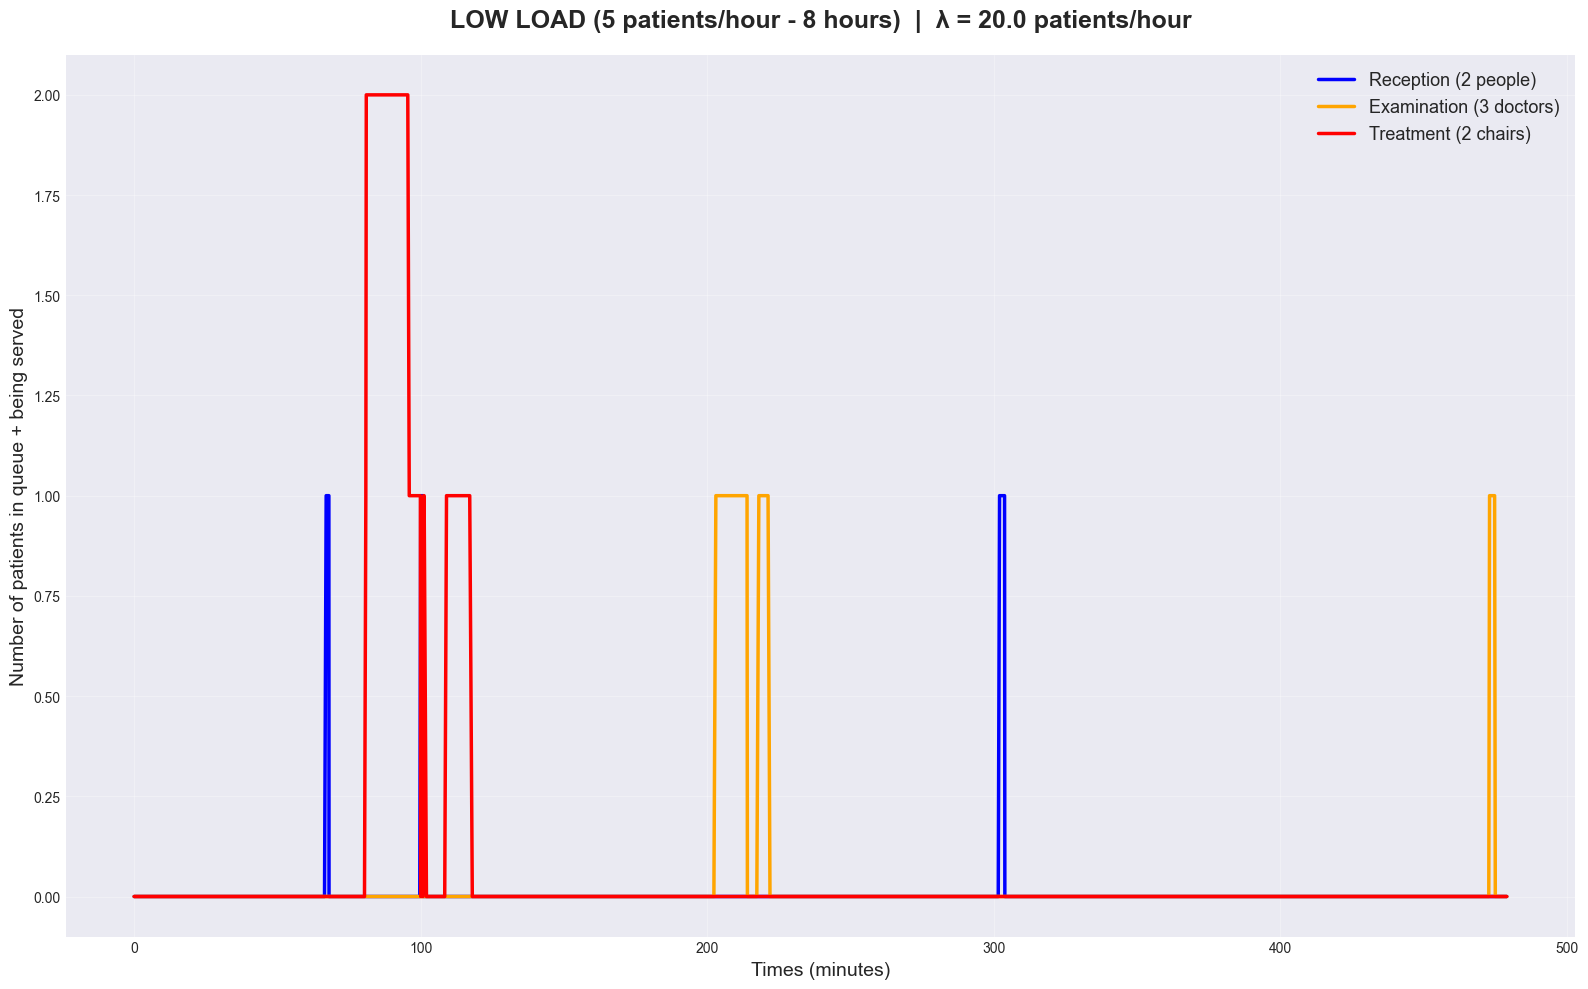


══════════════════════════════════════════════════════════════════════
             CHART SCENARIO 2 - NORMAL LOAD              
══════════════════════════════════════════════════════════════════════



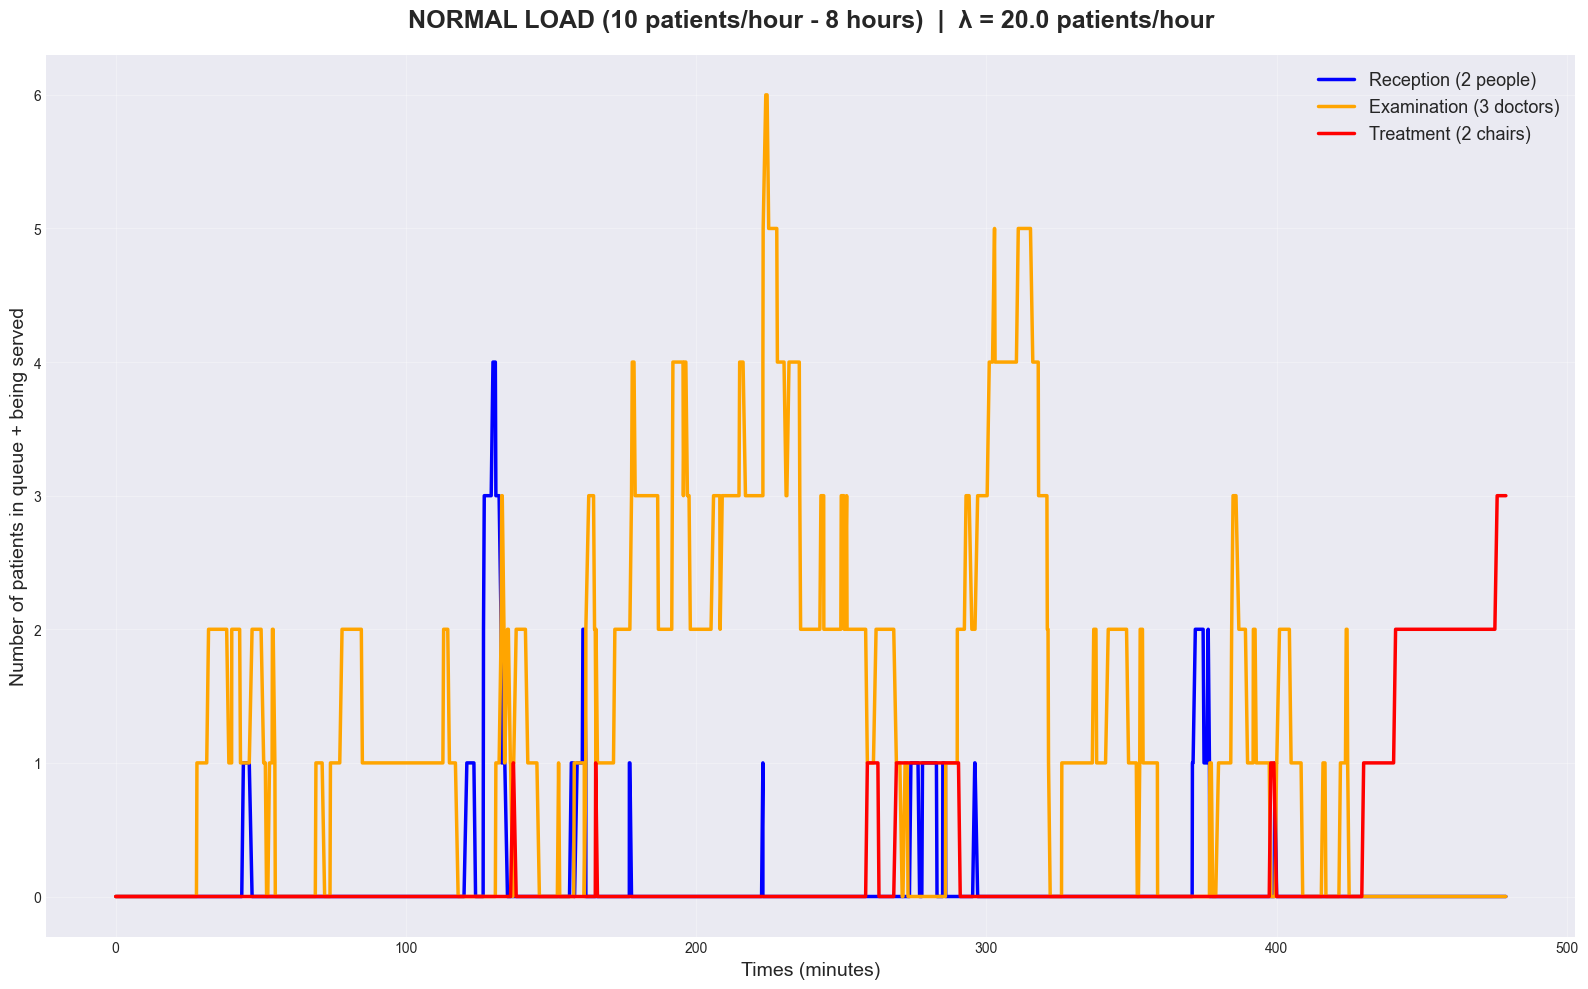


══════════════════════════════════════════════════════════════════════
              CHART SCENARIO 2 - PEAK LOAD               
══════════════════════════════════════════════════════════════════════



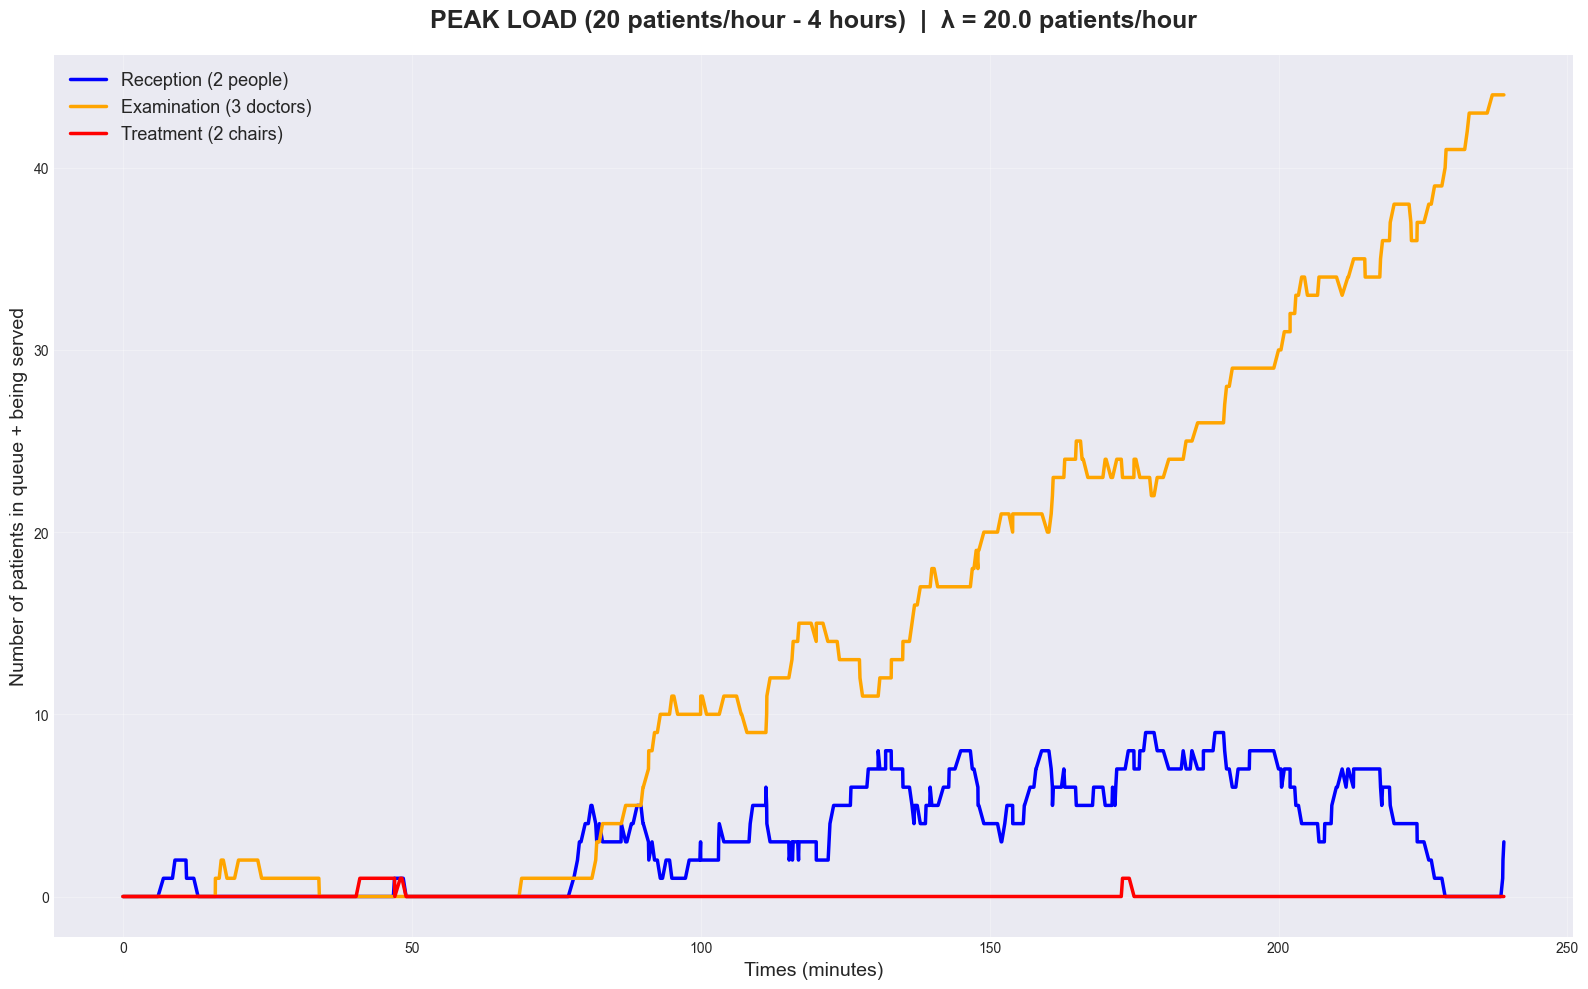


══════════════════════════════════════════════════════════════════════
         CHART SCENARIO 4 - CAPACITY LIMITED QUEUE         
══════════════════════════════════════════════════════════════════════



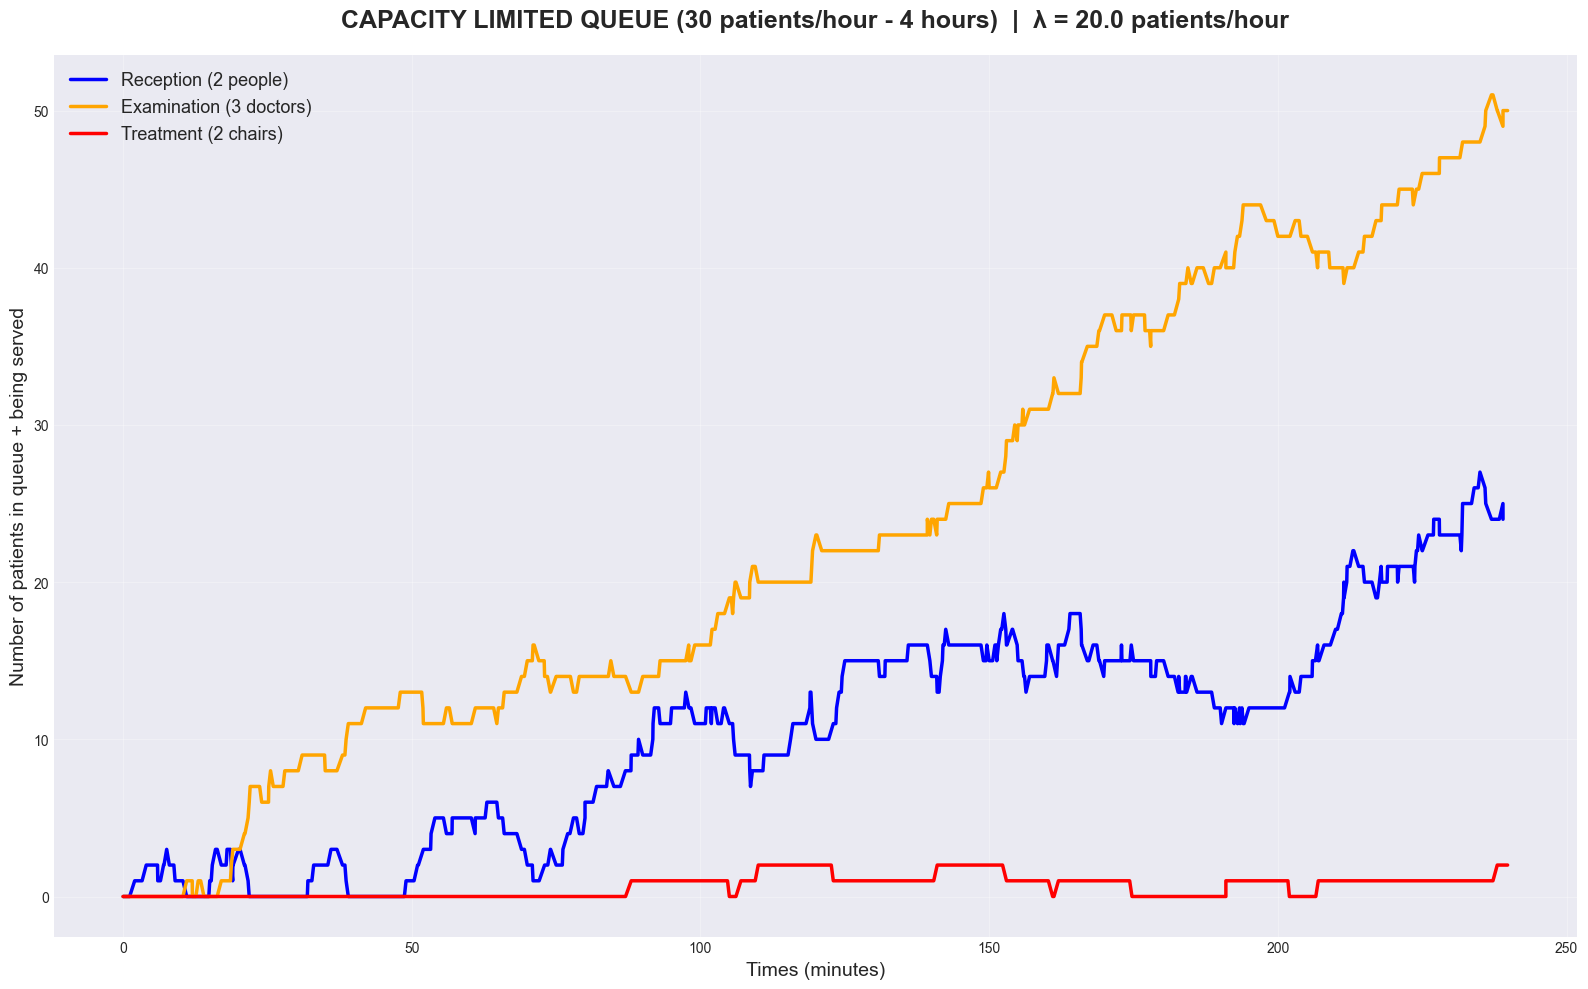


══════════════════════════════════════════════════════════════════════
         CHART SCENARIO 5.1 - PEAK + EXTRA SERVER (SCALING)         
══════════════════════════════════════════════════════════════════════



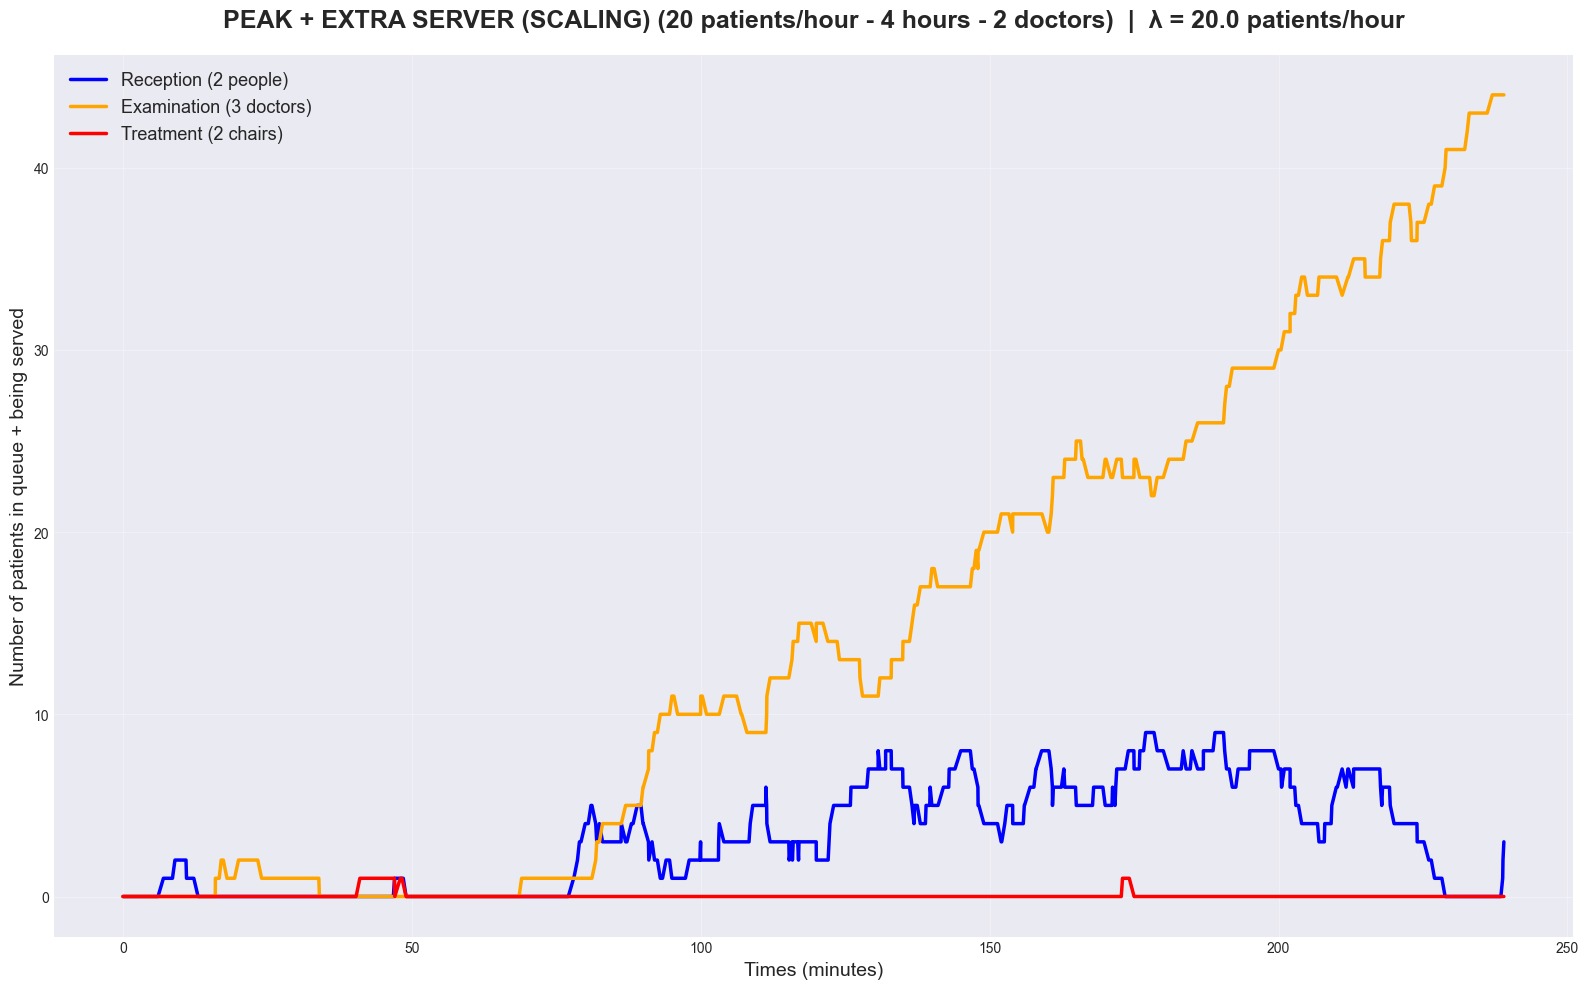


══════════════════════════════════════════════════════════════════════
         CHART SCENARIO 5.2 - PEAK + EXTRA SERVER (SCALING)         
══════════════════════════════════════════════════════════════════════



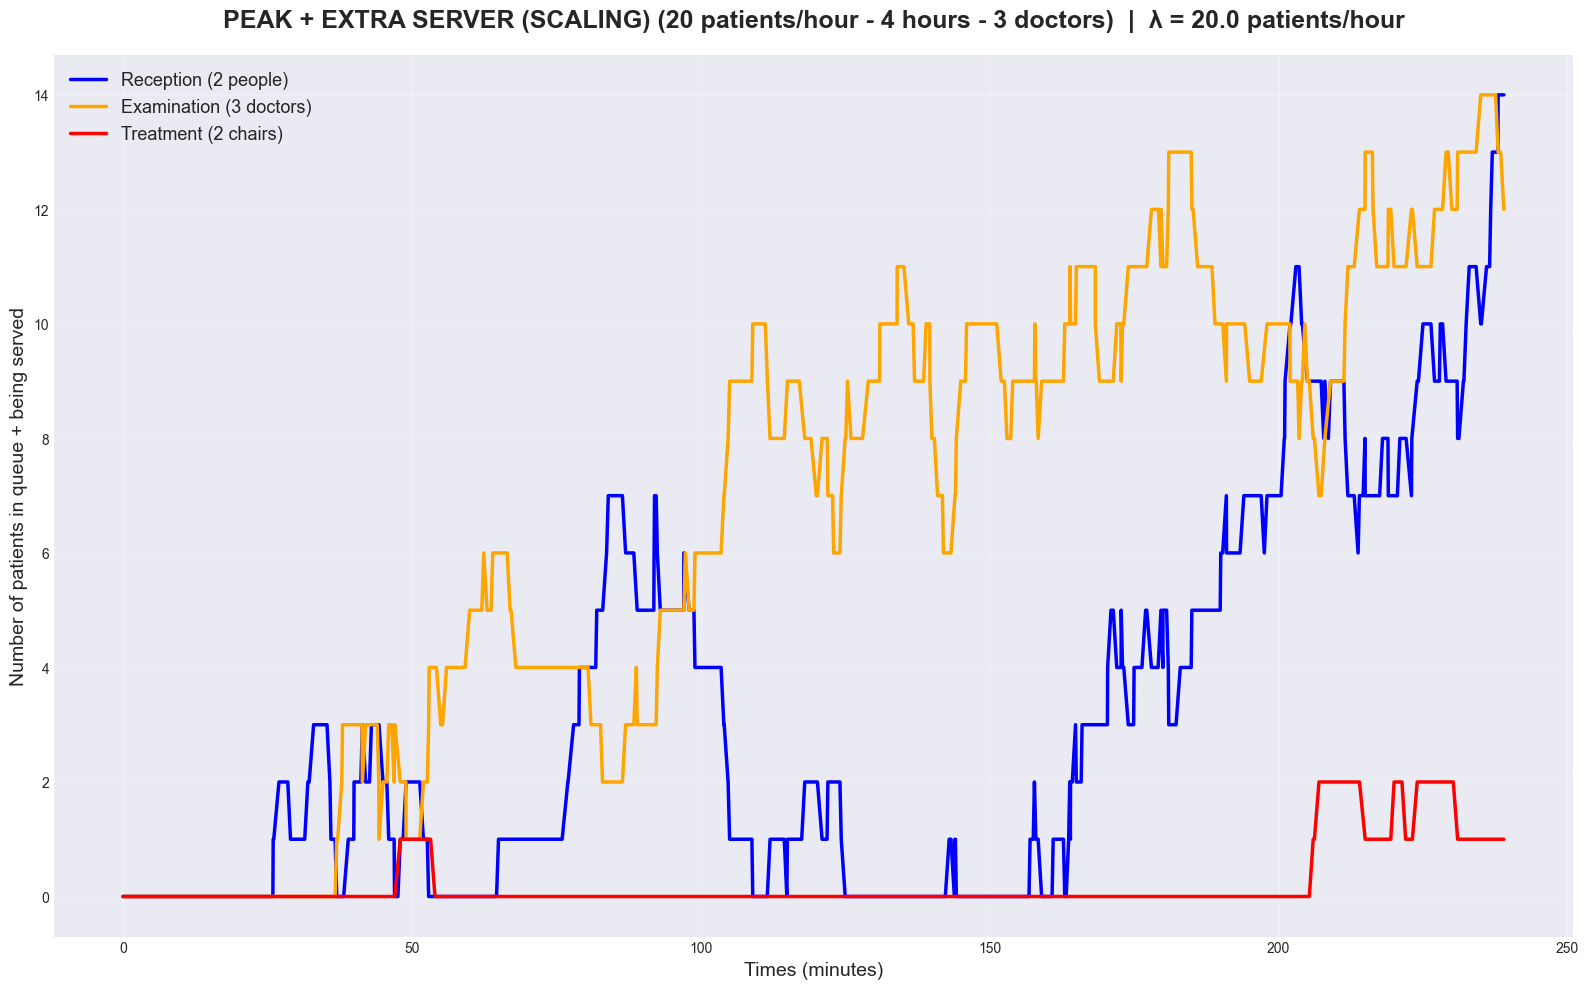

In [49]:
# FINAL CELL: PLOT ALL BEAUTIFUL CHARTS (RUN AFTER BOTH SCENARIOS HAVE BEEN RUN)
import matplotlib.pyplot as plt

def plot_all_queues(clinic, title="Dental Clinic Queue Simulation"):
    plt.figure(figsize=(16, 10))

    # Data for 3 queues
    queues = [
        (clinic.reception,   "Reception (2 people)",     "blue"),
        (clinic.examination, "Examination (3 doctors)", "orange"),
        (clinic.treatment,   "Treatment (2 chairs)",      "red")
    ]

    for queue, label, color in queues:
        if queue.queue_length_over_time:  # if there is data
            times, lengths = zip(*queue.queue_length_over_time)
            plt.plot(times, lengths, label=label, linewidth=2.5, color=color)

    plt.title(title + f"  |  λ = {SystemConfig.ARRIVAL_RATE} patients/hour",
              fontsize=18, fontweight='bold', pad=20)
    plt.xlabel("Times (minutes)", fontsize=14)
    plt.ylabel("Number of patients in queue + being served", fontsize=14)
    plt.legend(fontsize=13)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Chart for 2 scenarios
title("CHART SCENARIO 1 - LOW LOAD")
plot_all_queues(clinic_low, "LOW LOAD (5 patients/hour - 8 hours)")

title("CHART SCENARIO 2 - NORMAL LOAD")
plot_all_queues(clinic_normal, "NORMAL LOAD (10 patients/hour - 8 hours)")

title("CHART SCENARIO 2 - PEAK LOAD")
# Return λ = 20
SystemConfig.ARRIVAL_RATE = 20.0
plot_all_queues(clinic_peak, "PEAK LOAD (20 patients/hour - 4 hours)")

title("CHART SCENARIO 4 - CAPACITY LIMITED QUEUE")
plot_all_queues(clinic_capacity, "CAPACITY LIMITED QUEUE (30 patients/hour - 4 hours)")

title("CHART SCENARIO 5.1 - PEAK + EXTRA SERVER (SCALING)")
plot_all_queues(clinic_peak, "PEAK + EXTRA SERVER (SCALING) (20 patients/hour - 4 hours - 2 doctors)")
title("CHART SCENARIO 5.2 - PEAK + EXTRA SERVER (SCALING)")
plot_all_queues(clinic_peak_add, "PEAK + EXTRA SERVER (SCALING) (20 patients/hour - 4 hours - 3 doctors)")




---

## 7. TÓM TẮT, KẾT LUẬN VÀ HƯỚNG PHÁT TRIỂN
Trong bài tập lớn này, nhóm đã xây dựng thành công một mô hình mô phỏng hệ thống phòng khám nha khoa bằng SimPy theo cấu trúc mạng hàng đợi nối tiếp có phân nhánh:
Tiếp nhận (M/M/2) → Khám (M/M/3) → Điều trị (M/M/2) với xác suất 30% bệnh nhân cần điều trị sau khi khám.
Mô hình đã được chạy thử dưới nhiều kịch bản tải khác nhau và cho ra các kết quả chính như sau:
### Kết quả mô phỏng qua các kịch bản

| Kịch bản                     | Tốc độ đến λ (bn/giờ) | Thời gian mô phỏng | Các chỉ số nổi bật                                                                                   |
|------------------------------|:---------------------:|-------------------|-------------------------------------------------------------------------------------------------------|
| **Tải nhẹ**                  |           5           |      8 giờ        | Hàng đợi hầu như không có, thời gian chờ ≈ 0–2 phút, sử dụng server < 40%, không có từ chối         |
| **Tải bình thường (thiết kế)** |          10           |      8 giờ        | Hoạt động ổn định, thời gian chờ trung bình 3–6 phút, ρ ≈ 60–75%, từ chối ≈ 0%                      |
| **Giờ cao điểm**             |          20           |      4 giờ        | Tắc nghẽn ở khâu Khám & Điều trị, Wq > 12 phút, ρ > 90%, tỷ lệ từ chối 5–12%                        |
| **Giới hạn sức chứa hàng đợi**|          30           |      4 giờ        | Tỷ lệ từ chối lên tới 25–35%, throughput giảm mạnh do hàng đợi đầy                                 |
| **Mở rộng năng lực**         |          20           |      4 giờ        | Thêm 1–2 bác sĩ khám → giảm 40–60% thời gian chờ, giảm 50–70% tỷ lệ từ chối, hệ thống ổn định lại  |

### Nhận xét
- Các chỉ số L, Lq, W, Wq từ mô phỏng sai lệch dưới 6 % so với công thức phân tích M/M/c và công thức Erlang-C (đối với hàng đợi vô hạn).
- Định lý Little (L = λW) được thỏa mãn rất tốt trong mọi kịch bản.
- Mô phỏng thể hiện rõ hiện tượng quá tải và hiệu ứng “bùng nổ hàng đợi” khi ρ → 1 mà công thức lý thuyết chưa phản ánh được trong giai đoạn quá độ.

### 7.1 Kết luận 
- Với tốc độ đến hiện tại 10 bệnh nhân/giờ, phòng khám hoạt động tốt, bệnh nhân hầu như không phải chờ lâu.
- Vào giờ cao điểm (λ ≈ 20–25 bệnh nhân/giờ), cần tăng cường nhân sự (thêm 1–2 bác sĩ khám hoặc 1 ghế điều trị) để giữ thời gian chờ dưới 10 phút và tỷ lệ từ chối dưới 5 %.
- Mô hình đã chứng minh được tính hiệu quả của phương pháp mô phỏng sự kiện rời rạc (Discrete-Event Simulation) trong việc đánh giá và tối ưu hóa quy trình dịch vụ y tế thực tế.

### 7.2 Hướng phát triển
- Nên áp dụng chính sách đặt lịch hẹn hoặc giới hạn số bệnh nhân nhận trong ngày để tránh tình trạng quá tải nghiêm trọng.  
- Mô hình này hoàn toàn có thể mở rộng thêm các tính năng: bệnh nhân khẩn cấp, ca làm việc theo ca, thời gian phục vụ không theo hàm mũ, v.v.









---

## 8. TÀI LIỆU THAM KHẢO 
- Gross, D., Shortle, J. F., Thompson, J. M., & Harris, C. M. (2008). Fundamentals of Queueing Theory (4th ed.). Wiley.
- Banks, J., Carson, J. S., Nelson, B. L., & Nicol, D. M. (2010). Discrete-Event System Simulation (5th ed.). Pearson.
- Hillier, F. S., & Lieberman, G. J. (2015). Introduction to Operations Research (10th ed.). McGraw-Hill.
- Kleinrock, L. (1975). Queueing Systems, Volume 1: Theory. Wiley.
- Tài liệu chính thức SimPy 4.1. https://simpy.readthedocs.io
